In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
import numpy as np
import matplotlib.pyplot as pp
x=np.random.rand(1000,1)*100
x3=np.concatenate([x,x,x],axis=1)
print(x3.shape)

(1000, 3)


In [70]:
y=5.1*x[:,0]+5*np.sin(x[:,0])+3+np.random.rand(1000)*0.5 
print(y.shape)

(1000,)


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
clf = LinearRegression()
clf.fit(x3, y)
ym = clf.predict(x3)
print('Coefs LR: ', clf.coef_, clf.intercept_)
print(f'score {clf.score(x3, y)}' ) 

Coefs LR:  [1.69678407 1.69678407 1.69678407] 3.7846152285524113
score 0.9994632536337175


In [72]:
x=np.random.rand(1000,1)*100
x3=np.concatenate([x,x*10+np.random.rand(1000,1)*0.1,x*30+np.random.rand(1000,1)*0.1],axis=1)
y=5.1*x[:,0]+5*np.sin(x[:,0])+3+np.random.rand(1000)*0.5  

clf = LinearRegression()
clf.fit(x3, y)
ym = clf.predict(x3)
print('Coefs LR: ', clf.coef_, clf.intercept_)
print(f'score {clf.score(x3, y)}' ) 

Coefs LR:  [-129.27845128    0.24606906    4.39708701] 3.203363867634721
score 0.9993894625085984


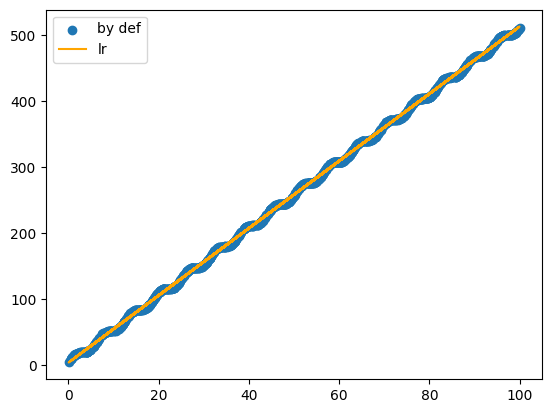

In [73]:
plt.scatter(x, y, label='by def')
plt.plot(x3[:, 0], ym, color='orange', label='lr') 
plt.legend()
plt.show()

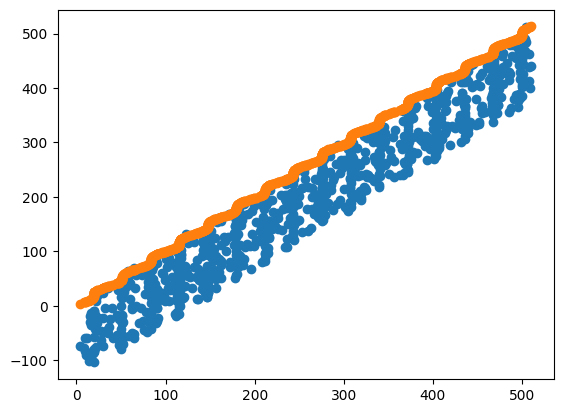

In [74]:
x4 = x3 + np.random.rand(1000, 3) * 1
yp = clf.predict(x4)
plt.scatter(y, yp)
yp2 = clf.predict(x3)
plt.scatter(y, yp2)
plt.show()

Coefs LR: [ 0.57816962 -0.08780912  0.17984259] 3.0654319519907745
score:  0.9993892009203738


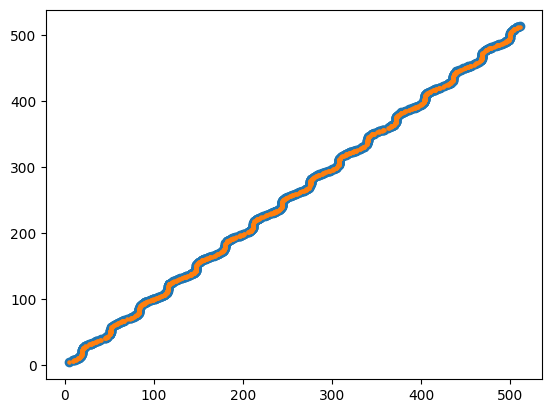

In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(x4, y)
yp = clf.predict(x4)

print('Coefs LR:', clf.coef_, clf.intercept_)
print('score: ', clf.score(x4, y))
plt.scatter(y, yp)
yp2 = clf.predict(x3)
plt.scatter(y, yp2, s=5)
plt.show()


Coefs LR: [3.51865595e+00 1.49320415e-01 2.80831506e-03] 1.5110770710141992
score:  0.9993542187536392


d:\Data_science\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.384e+03, tolerance: 2.112e+03
  model = cd_fast.enet_coordinate_descent(


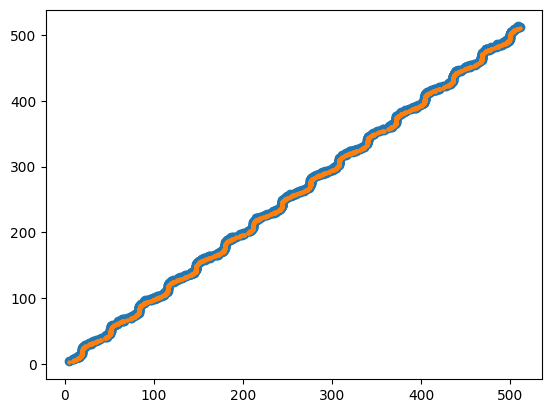

In [76]:
from sklearn.linear_model import Lasso
clf = Lasso() #alpha = 3)
clf.fit(x4, y)
yp = clf.predict(x4)

print('Coefs LR:', clf.coef_, clf.intercept_)
print('score: ', clf.score(x4, y))
plt.scatter(y, yp)
yp2 = clf.predict(x3)
plt.scatter(y, yp2, s=5)
plt.show()


In [92]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (3, )))
model.add(tf.keras.layers.Dense(1, activation = 'linear', kernel_regularizer = 'l1', bias_regularizer = 'l1'))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e0), loss = 'mse', metrics = ['mse'])
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3)
hist = model.fit(x3, y, validation_split = 0.2, epochs = 1000, callbacks = [es])
tf.keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True)

Epoch 1/1000


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 815575.7500 - mse: 815575.7500 - val_loss: 99200.1094 - val_mse: 99200.0781
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 143945.3438 - mse: 143945.3281 - val_loss: 3306.9451 - val_mse: 3306.9255
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124203.3516 - mse: 124203.3438 - val_loss: 1156.2802 - val_mse: 1156.2579
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 127565.7422 - mse: 127565.7188 - val_loss: 1224.7941 - val_mse: 1224.7648
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 123103.2500 - mse: 123103.2188 - val_loss: 661.7062 - val_mse: 661.6727
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 123265.0391 - mse: 123265.0000 - val_loss: 19.6208 - val_mse: 19.5820
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 127948.2812 - mse: 127948.2422 - val_loss: 20.6254 - val_mse: 20.5784
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122276.2500 - mse: 1222

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98321.3438 - mse: 98321.2812
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


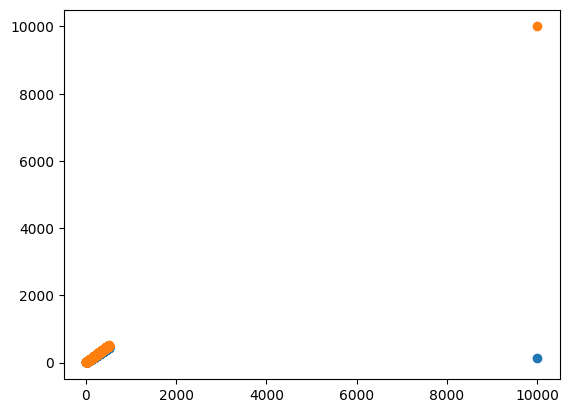

Weights:  [<Variable path=sequential_9/dense_16/kernel, shape=(3, 1), dtype=float32, value=[[ 0.66196537]
 [ 1.0088326 ]
 [-0.20650941]]>, <Variable path=sequential_9/dense_16/bias, shape=(1,), dtype=float32, value=[4.261465]>]


In [94]:
model.evaluate(x4, y)
ym = model.predict(x4)
plt.scatter(y, ym)
plt.scatter(y, y)
plt.show()
print('Weights: ', model.weights)

Epoch 1/10000


d:\Data_science\.venv\Lib\site-packages\keras\src\callbacks\early_stopping.py:77: UserWarning: EarlyStopping mode 'mae' is unknown, fallback to auto mode.
  super().__init__(monitor, mode, min_delta=min_delta)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 262.4788 - val_loss: 252.8000
Epoch 2/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 261.1752 - val_loss: 251.4960
Epoch 3/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 259.8869 - val_loss: 250.1663
Epoch 4/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 258.5773 - val_loss: 248.8583
Epoch 5/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257.2737 - val_loss: 247.5444
Epoch 6/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255.9725 - val_loss: 246.2227
Epoch 7/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254.6684 - val_loss: 244.9000
Epoch 8/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253.3647 - val_loss: 243.5761
Epoch 9/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 252.0622 - val_loss: 242.2513
Epoch 10/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 250.7540 - val_loss: 240.9376
Epoch 11/10000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 249.4488 - val_loss: 239.6233
Epoch 12/10

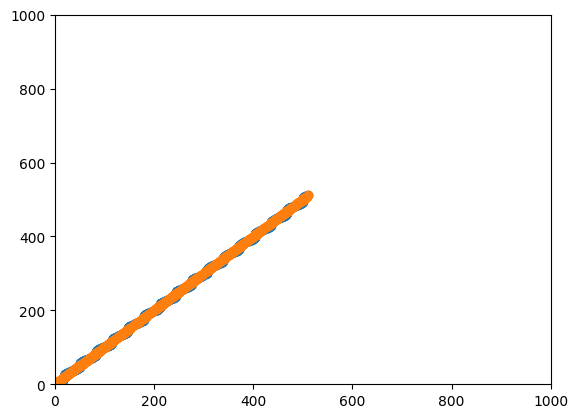

Weights:  [<Variable path=sequential_18/dense_25/kernel, shape=(1, 1), dtype=float32, value=[[5.069775]]>, <Variable path=sequential_18/dense_25/bias, shape=(1,), dtype=float32, value=[4.6865892]>]


In [104]:
x=np.random.rand(1000,1)*100
y=5.1*x[:,0]+5*np.sin(x[:,0])+3+np.random.rand(1000)*0.5 
y[100]=10000

import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_regularizer='l1',bias_regularizer='l1'))
model.compile(optimizer='adam',loss='mae')
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='mae',patience=3)
model.fit(x,y,epochs=10000,callbacks=[es],validation_split=0.2)
model.evaluate(x,y)

ym = model.predict(x)
plt.scatter(y, ym)
plt.scatter(y, y)
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()
print('Weights: ', model.weights)